In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from math import cos, sin,pi
import random as rn 
from sklearn.model_selection import train_test_split


In [2]:
# Creamos el Data set
n_datos = 100
rn.seed(5) # Primer espacio aleatorio
c_NO = (8.5,8.5) # centro de referencia
theta = [rn.random()*2*pi for _ in range(n_datos)] # angulo polar
L = [rn.random()*17/2 for _ in range(n_datos)]     # radio polar
No_Party = [[L[i]*cos(theta[i])+c_NO[0], L[i]*sin(theta[i])+c_NO[1], -1] for i in range(n_datos)]

rn.seed(15) # Segundo espacio aleatorio
c_NO = (19,19) # centro de referencia
theta = [rn.random()*2*pi for _ in range(n_datos)] # angulo polar
L = [rn.random()*17/2 for _ in range(n_datos)]     # radio polar
Si_Party = [[L[i]*cos(theta[i])+c_NO[0], L[i]*sin(theta[i])+c_NO[1], 1] for i in range(n_datos)]
#Juntamos la data
dataset_ = Si_Party + No_Party
dataset  = np.array(dataset_)
# Split Data for train and val'
X_train, X_val, y_train, y_val = train_test_split( dataset[:,0:2], dataset[:,2], 
                                                test_size=0.2, random_state=43,shuffle=True)

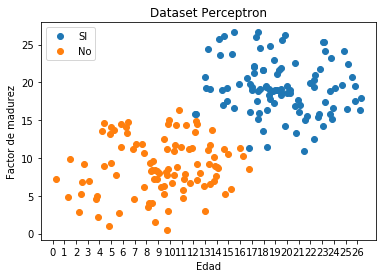

In [3]:
# Graficamos los datos
plt.plot(dataset[0:n_datos,0],dataset[0:n_datos,1],'o')
plt.plot(dataset[n_datos+1:,0],dataset[n_datos+1:,1],'o')
plt.xticks(np.arange(0, max(dataset[:,0]), 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Edad")
plt.ylabel("Factor de madurez")
plt.title("Dataset Perceptron")
plt.legend(['SI','No'])

In [4]:
def perceptron_single_step_update(x_feature,
                                y_label,
                                current_weight,
                                current_bias):
    error = y_label*(current_weight.dot(x_feature)+current_bias)
    if error<0 or abs(error)<1e-5:
        current_weight = current_weight + y_label*x_feature
        current_bias   = current_bias + y_label
    return current_weight, current_bias

def full_perceptron(feature_matrix,
                    labels,
                    T):
    weight = np.array([0 for _ in range(feature_matrix.shape[1])])
    bias = 0
    for t in range(T):
        for x,y in zip(feature_matrix, labels):
            weight, bias = perceptron_single_step_update(x,y,weight,bias)
    return weight, bias

def accuracy(y_predict, y_real):
    return (y_predict==y_real).mean()

def classify(x_feature, weight, bias):
    z = x_feature.dot(weight)+bias
    for i,val in enumerate(z):
        if val<0 or abs(val)<1e-5:
            z[i] = -1
        else:
            z[i] = 1
    return z

In [5]:
# Precision con datos de validación
weight, bias = full_perceptron(X_train, y_train, 50)
predic = classify(X_val, weight, bias)
acc = accuracy(predic, y_val)
print('Accuracy val = ', acc)

Accuracy val =  1.0


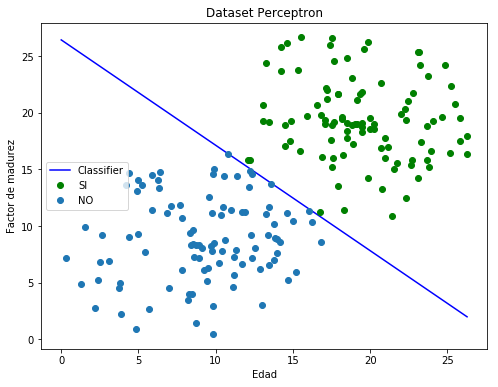

In [6]:
#Graficando el límite de decisión 
xs = np.linspace(0, max(dataset[:,0]))
ys = -(weight[0]*xs + bias) / (weight[1] + 1e-16)
plt.plot(xs, ys, 'b-')
plt.plot(dataset[0:n_datos,0],dataset[0:n_datos,1],'go')
plt.plot(dataset[n_datos+1:,0],dataset[n_datos+1:,1],'o')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Edad")
plt.ylabel("Factor de madurez")
plt.title("Dataset Perceptron")
plt.legend(['Classifier','SI','NO'])